In [57]:
#import packages


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import geopandas as gpd
#from shapely.geometry import Point, Polygon, box
#import fiona
#import pyproj
#import contextily as ctx
import os
import requests
import matplotlib.ticker as ticker
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.ticker import PercentFormatter
import requests
import matplotlib.colors as colors
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.ticker as ticker


#%matplotlib widget
%matplotlib inline

In [58]:
!pip3 install openpyxl

# This notebook will combine the data logs collected from different instruments at UW

In [59]:
!pwd

/Users/amandaworthy/CS4EVN/Data


In [60]:
!ls

Data_Organization_Instruments.ipynb QUESTTEMP_Reports
Gas_Lab_Reports                     box_plot_hour.pdf


In [61]:
#code to grab specific gaslab report

one= pd.read_csv("Gas_Lab_Reports/Allen 605/January-24-2023_Allen.csv", sep=',', header=[1])
one.head()



Unnamed: 0  CO2  Temperature  Humidity  Unnamed: 4
0  01/24/23 14:12:31.119    0        24.05     32.57         NaN
1  01/24/23 14:13:31.110  593        24.20     32.06         NaN
2  01/24/23 14:14:31.110  590        24.32     31.96         NaN
3  01/24/23 14:15:31.098  597        24.39     31.79         NaN
4  01/24/23 14:16:31.102  594        24.46     31.48         NaN

## Read in all files from gaslab

In [62]:
import os
import pandas as pd
import glob
import openpyxl
path_co2 = os.path.abspath('Gas_Lab_Reports/Allen 605') 
files_co2 = os.listdir(path_co2) 
file_list_co2 = glob.glob(path_co2 + "/*.csv")
file_list_co2

['/Users/amandaworthy/CS4EVN/Data/Gas_Lab_Reports/Allen 605/January-24-2023_Allen.csv']

In [63]:
df = pd.DataFrame()
for file in file_list_co2:
    temp_df = pd.read_csv(file, header=[1])
    df = pd.concat([df, temp_df], axis=0)


#remove columns w only na
df= df.dropna(axis=1, how='all')

#rename columns
df= df.rename(columns= {"Unnamed: 0": "Timestamp", 'CO2': "CO2_gas_lab", 'Temperature': "Temperature_gas_lab", 'Humidity': "Humidity_gas_lab"})

#make datetime column a datetime :) 

df['Timestamp'] =  pd.to_datetime(df['Timestamp'], utc = True)
df["Timestamp"] = df["Timestamp"].dt.round("min")


#remove small/ zero observations
df= df[~(df['CO2_gas_lab'] <= 10)]
df

Timestamp  CO2_gas_lab  Temperature_gas_lab  \
1    2023-01-24 14:14:00+00:00          593                24.20   
2    2023-01-24 14:15:00+00:00          590                24.32   
3    2023-01-24 14:16:00+00:00          597                24.39   
4    2023-01-24 14:17:00+00:00          594                24.46   
5    2023-01-24 14:18:00+00:00          601                24.52   
...                        ...          ...                  ...   
6654 2023-01-30 10:08:00+00:00          504                24.30   
6655 2023-01-30 10:10:00+00:00          501                24.31   
6656 2023-01-30 10:12:00+00:00          552                24.30   
6657 2023-01-30 10:14:00+00:00          559                24.30   
6658 2023-01-30 10:16:00+00:00          521                24.31   

      Humidity_gas_lab  
1                32.06  
2                31.96  
3                31.79  
4                31.48  
5                31.42  
...                ...  
6654             16.70  
6655             16.66  
6656             16.94  
6657             16.80  
6658             16.80  

[6658 rows x 4 columns]

In [64]:
#intentionaly left blank

## Read in all files from Questtemp

In [65]:
!pwd

/Users/amandaworthy/CS4EVN/Data


In [66]:
import os
import pandas as pd
import glob
import openpyxl
path_temp = os.path.abspath('QUESTTEMP_Reports/Allen 605/') 
files_temp = os.listdir(path_temp) 
file_list_temp = glob.glob(path_temp + "/*.csv")
file_list_temp

['/Users/amandaworthy/CS4EVN/Data/QUESTTEMP_Reports/Allen 605/1_20_2023_Allen_2.csv']

In [67]:
#only have one df right now so haven't figured out full syntex 

df_temp = pd.DataFrame()
for file in file_list_temp:
    print(file)
    df2 = pd.read_csv(file, header=[0])
    df_temp = pd.concat([df_temp, df2], axis=0)


#remove columns w only na
df_temp= df_temp.dropna(axis=1, how='all')

#rename columns
#df= df.rename(columns= {"Unnamed: 0": "Date_Time", 'CO2': "CO2_gas_lab", 'Temperature': "Temperature_gas_lab", 'Humidity': "Humidity_gas_lab"})

#make datetime column a datetime :) 

df_temp['Timestamp'] =  pd.to_datetime(df_temp['Timestamp'], utc = True)
df_temp

/Users/amandaworthy/CS4EVN/Data/QUESTTEMP_Reports/Allen 605/1_20_2023_Allen_2.csv


Timestamp  DryBulb  Globe  HeatIndex  Humidity  WBGTIn  \
0    2023-01-18 17:21:00+00:00     23.0   23.8       21.9      32.5    17.1   
1    2023-01-18 17:23:00+00:00     23.2   23.8       22.0      31.8    17.1   
2    2023-01-18 17:25:00+00:00     23.3   23.7       22.0      31.6    17.1   
3    2023-01-18 17:27:00+00:00     23.3   23.6       22.0      31.2    17.0   
4    2023-01-18 17:29:00+00:00     23.4   23.6       22.0      31.0    17.0   
...                        ...      ...    ...        ...       ...     ...   
8428 2023-01-30 10:17:00+00:00     23.7   23.6        NaN      12.6    15.0   
8429 2023-01-30 10:19:00+00:00     23.7   23.7        NaN      12.6    15.1   
8430 2023-01-30 10:21:00+00:00     23.7   23.8        NaN      12.6    15.1   
8431 2023-01-30 10:23:00+00:00     23.8   23.8        NaN      12.4    15.1   
8432 2023-01-30 10:25:00+00:00     23.8   23.8        NaN      12.4    15.1   

      WBGTOut  WetBulb  
0        17.0     14.2  
1        17.0     14.2  
2        17.0     14.2  
3        17.0     14.2  
4        17.0     14.2  
...       ...      ...  
8428     15.0     11.4  
8429     15.1     11.4  
8430     15.1     11.4  
8431     15.1     11.4  
8432     15.1     11.4  

[8433 rows x 8 columns]

## Read in the ATMS Building Outdoor Data 

In [68]:
atms_file= "/Users/amandaworthy/CS4EVN/UWASH Outdoor Data/UWASH.2023-01-31.csv"
UWASH = pd.read_csv(atms_file, sep=',', header=[10])
#remove station ID 
UWASH= UWASH.drop(['Station_ID'], axis=1)
#remove units 
UWASH= UWASH.drop(0,axis=0)

#make pd datetime 
UWASH.Date_Time= pd.to_datetime(UWASH.Date_Time, utc = False)

#convert all to numbers besides the wind, date

cols = UWASH.columns.drop(['Date_Time','wind_cardinal_direction_set_1d'])
#cols = UWASH.columns.drop(['Date_Time'])

UWASH[cols] = UWASH[cols].apply(pd.to_numeric, errors='coerce')

#drop cols with no data 
UWASH= UWASH.dropna(axis=1, how='all')

#rename columns 
UWASH= UWASH.rename(columns= {"Date_Time": "Timestamp", 'air_temp_set_1': "outdoor_air_temp_C", 'relative_humidity_set_1': "outdoor_relative_humidity_%", 'wind_chill_set_1d': "outdoor_wind_chill_C", 'heat_index_set_1d': "heat_index_C", "wind_speed_set_1": "outdoor_wind_speed_mpers", 
                             "wind_direction_set_1": "outdoor_wind_direction_deg", "wind_gust_set_1": "Outdoor_wind_gust_mpers","precip_accum_set_1" : "precip_accum_mm","sea_level_pressure_set_1": "sea_level_pressure_pascals", "dew_point_temperature_set_1d": "dew_point_temperature_C",  "wind_cardinal_direction_set_1d": "wind_cardinal_direction"   })

UWASH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 1 to 710
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   Timestamp                    710 non-null    datetime64[ns, UTC]
 1   outdoor_air_temp_C           710 non-null    float64            
 2   outdoor_relative_humidity_%  710 non-null    float64            
 3   outdoor_wind_speed_mpers     710 non-null    float64            
 4   outdoor_wind_direction_deg   710 non-null    float64            
 5   Outdoor_wind_gust_mpers      710 non-null    float64            
 6   precip_accum_mm              339 non-null    float64            
 7   sea_level_pressure_pascals   710 non-null    float64            
 8   dew_point_temperature_C      710 non-null    float64            
 9   outdoor_wind_chill_C         1 non-null      float64            
 10  wind_cardinal_direction      710 non-null    objec

In [69]:
UWASH.head()

Timestamp  outdoor_air_temp_C  outdoor_relative_humidity_%  \
1 2023-01-01 12:55:00+00:00                5.56                        100.0   
2 2023-01-01 13:55:00+00:00                6.11                        100.0   
3 2023-01-01 14:55:00+00:00                6.11                        100.0   
4 2023-01-01 15:55:00+00:00                6.11                        100.0   
5 2023-01-01 16:55:00+00:00                6.11                        100.0   

   outdoor_wind_speed_mpers  outdoor_wind_direction_deg  \
1                      0.00                        82.0   
2                      1.03                       311.0   
3                      0.00                       352.0   
4                      0.00                        90.0   
5                      0.51                       313.0   

   Outdoor_wind_gust_mpers  precip_accum_mm  sea_level_pressure_pascals  \
1                     0.00              0.0                    101900.0   
2                     1.03              0.0                    101950.0   
3                     1.03              0.0                    101990.0   
4                     0.51              0.0                    101960.0   
5                     1.03              0.0                    102050.0   

   dew_point_temperature_C  outdoor_wind_chill_C wind_cardinal_direction  
1                     5.56                   NaN                       E  
2                     6.11                   NaN                      NW  
3                     6.11                   NaN                       N  
4                     6.11                   NaN                       E  
5                     6.11                   NaN                      NW

In [70]:
#intentionaly left blank

## Merge the two df together from CO2 sensor and Tempoquest
#### Merge by timestamp

In [71]:
print(df_temp.shape)
df_temp.head()

(8433, 8)


Timestamp  DryBulb  Globe  HeatIndex  Humidity  WBGTIn  \
0 2023-01-18 17:21:00+00:00     23.0   23.8       21.9      32.5    17.1   
1 2023-01-18 17:23:00+00:00     23.2   23.8       22.0      31.8    17.1   
2 2023-01-18 17:25:00+00:00     23.3   23.7       22.0      31.6    17.1   
3 2023-01-18 17:27:00+00:00     23.3   23.6       22.0      31.2    17.0   
4 2023-01-18 17:29:00+00:00     23.4   23.6       22.0      31.0    17.0   

   WBGTOut  WetBulb  
0     17.0     14.2  
1     17.0     14.2  
2     17.0     14.2  
3     17.0     14.2  
4     17.0     14.2

In [72]:
print(df.shape)
df.head()


(6658, 4)


Timestamp  CO2_gas_lab  Temperature_gas_lab  \
1 2023-01-24 14:14:00+00:00          593                24.20   
2 2023-01-24 14:15:00+00:00          590                24.32   
3 2023-01-24 14:16:00+00:00          597                24.39   
4 2023-01-24 14:17:00+00:00          594                24.46   
5 2023-01-24 14:18:00+00:00          601                24.52   

   Humidity_gas_lab  
1             32.06  
2             31.96  
3             31.79  
4             31.48  
5             31.42

In [73]:
#want to merge but keep all values 
df_temp_co2= pd.merge(df, df_temp, on= "Timestamp", how='inner')

df_temp_co2.sort_values(by='Timestamp', inplace = True) 
df_temp_co2.tail()


Timestamp  CO2_gas_lab  Temperature_gas_lab  \
3324 2023-01-30 09:59:00+00:00          505                24.30   
3325 2023-01-30 10:01:00+00:00          504                24.27   
3326 2023-01-30 10:03:00+00:00          505                24.29   
3327 2023-01-30 10:05:00+00:00          505                24.30   
3328 2023-01-30 10:07:00+00:00          503                24.30   

      Humidity_gas_lab  DryBulb  Globe  HeatIndex  Humidity  WBGTIn  WBGTOut  \
3324             16.66     23.7   23.7        NaN      12.3    15.0     15.0   
3325             16.66     23.7   23.6        NaN      12.3    15.0     15.0   
3326             16.66     23.7   23.6        NaN      12.4    15.0     15.0   
3327             16.66     23.7   23.6        NaN      12.4    15.0     15.0   
3328             16.70     23.7   23.6        NaN      12.4    15.0     15.0   

      WetBulb  
3324     11.3  
3325     11.3  
3326     11.3  
3327     11.3  
3328     11.3

In [74]:
#want to merge but keep all values 
df_all= pd.merge(df_temp_co2, UWASH, on= "Timestamp", how='inner')

df_all.sort_values(by='Timestamp', inplace = True) 
df_all.tail()

Timestamp  CO2_gas_lab  Temperature_gas_lab  \
104 2023-01-29 19:55:00+00:00          472                24.41   
105 2023-01-29 21:55:00+00:00          485                24.39   
106 2023-01-30 02:55:00+00:00          480                24.30   
107 2023-01-30 03:55:00+00:00          487                24.31   
108 2023-01-30 08:55:00+00:00          504                24.28   

     Humidity_gas_lab  DryBulb  Globe  HeatIndex  Humidity  WBGTIn  WBGTOut  \
104             15.68     23.9   23.8        NaN      11.2    15.0     15.0   
105             16.17     23.8   23.8        NaN      11.9    15.0     15.0   
106             15.61     23.7   23.5        NaN      11.4    14.9     14.9   
107             16.17     23.7   23.5        NaN      11.9    14.9     14.9   
108             16.66     23.7   23.6        NaN      12.3    15.0     15.0   

     ...  outdoor_air_temp_C  outdoor_relative_humidity_%  \
104  ...                4.44                         52.0   
105  ...               -8.89                         47.0   
106  ...                2.78                         47.0   
107  ...                2.78                         49.0   
108  ...              -10.56                         59.0   

     outdoor_wind_speed_mpers  outdoor_wind_direction_deg  \
104                      3.60                        54.0   
105                      4.63                       281.0   
106                      3.60                       345.0   
107                      1.54                        25.0   
108                      3.09                        76.0   

     Outdoor_wind_gust_mpers  precip_accum_mm  sea_level_pressure_pascals  \
104                     5.14              NaN                    103230.0   
105                     7.20              NaN                    103150.0   
106                     4.63              NaN                    103070.0   
107                     3.09              NaN                    103080.0   
108                     4.12              NaN                    103130.0   

     dew_point_temperature_C  outdoor_wind_chill_C  wind_cardinal_direction  
104                    -4.66                   NaN                       NE  
105                   -18.26                   NaN                        W  
106                    -7.53                   NaN                      NNW  
107                    -6.99                   NaN                      NNE  
108                   -17.10                   NaN                      ENE  

[5 rows x 21 columns]

In [75]:
df_temp_co2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3329 entries, 0 to 3328
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Timestamp            3329 non-null   datetime64[ns, UTC]
 1   CO2_gas_lab          3329 non-null   int64              
 2   Temperature_gas_lab  3329 non-null   float64            
 3   Humidity_gas_lab     3329 non-null   float64            
 4   DryBulb              3329 non-null   float64            
 5   Globe                3329 non-null   float64            
 6   HeatIndex            787 non-null    float64            
 7   Humidity             3329 non-null   float64            
 8   WBGTIn               3329 non-null   float64            
 9   WBGTOut              3329 non-null   float64            
 10  WetBulb              3329 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(9), int64(1)
memory usage: 312.1 KB


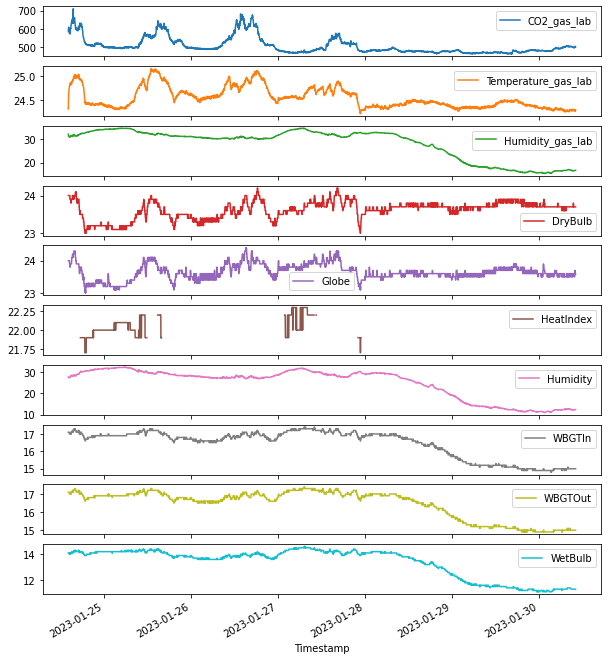

In [76]:
df_temp_co2= df_temp_co2.set_index('Timestamp')
df_temp_co2.plot(subplots=True, figsize=(10,12));

In [77]:
list(df_temp_co2.columns)

temp_columns= ['DryBulb',
 'Globe',
 'WBGTIn',
 'WBGTOut',
 'WetBulb',
 'Temperature_gas_lab']


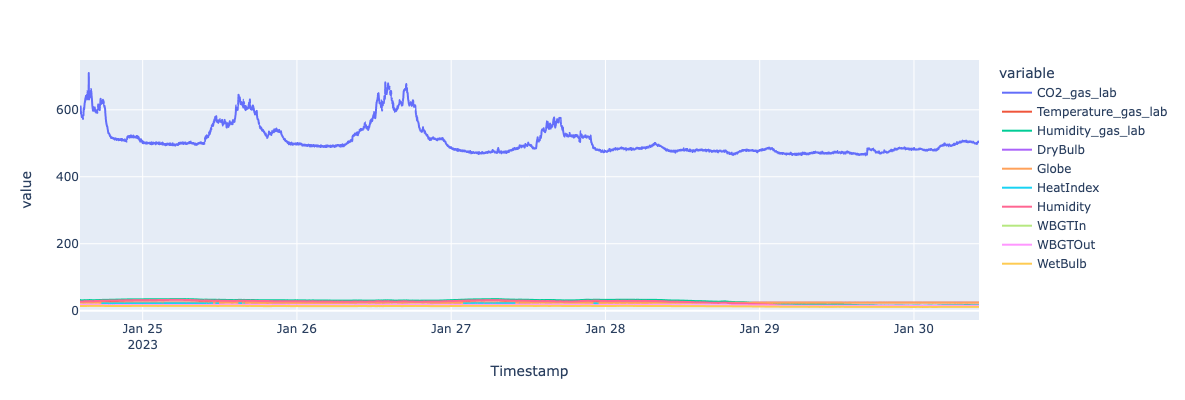

In [78]:
import plotly.express as px

px.line(df_temp_co2, x = df_temp_co2.index, y = df_temp_co2.columns, width=800, height=400)

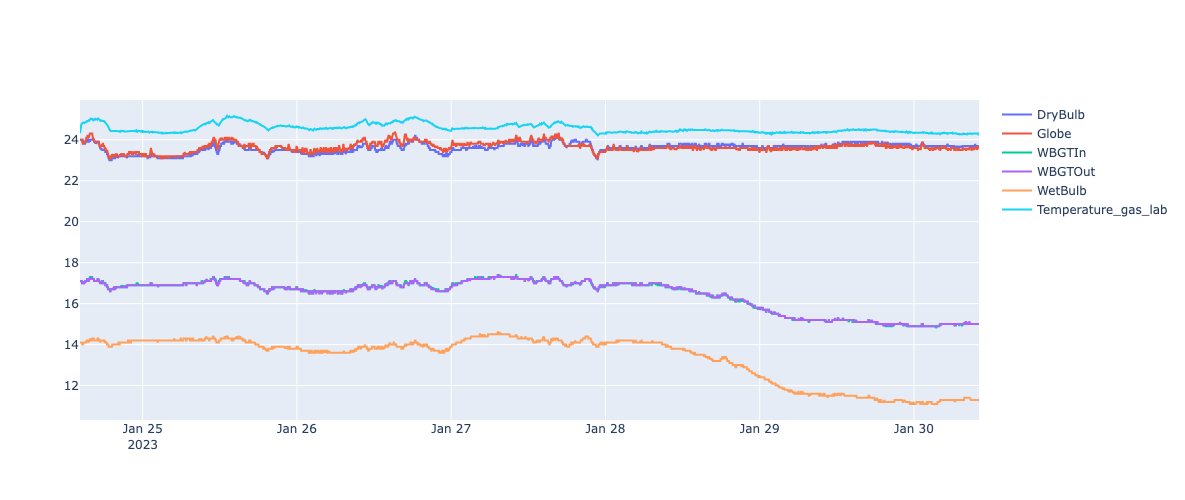

In [79]:
import plotly.graph_objs as go

layout = go.Layout(
    autosize=False,
    width=1000,
    height=500)
    
    
fig = go.Figure([{
    'x': df_temp_co2.index,
    'y': df_temp_co2[col],
    'name': col
}  for col in temp_columns], layout=layout)
fig.show()

In [80]:
df_all= df_all.set_index('Timestamp')

In [81]:
list(df_all.columns)


temp_columns= ['DryBulb',
 'Globe',
 'WetBulb',
 'Temperature_gas_lab']

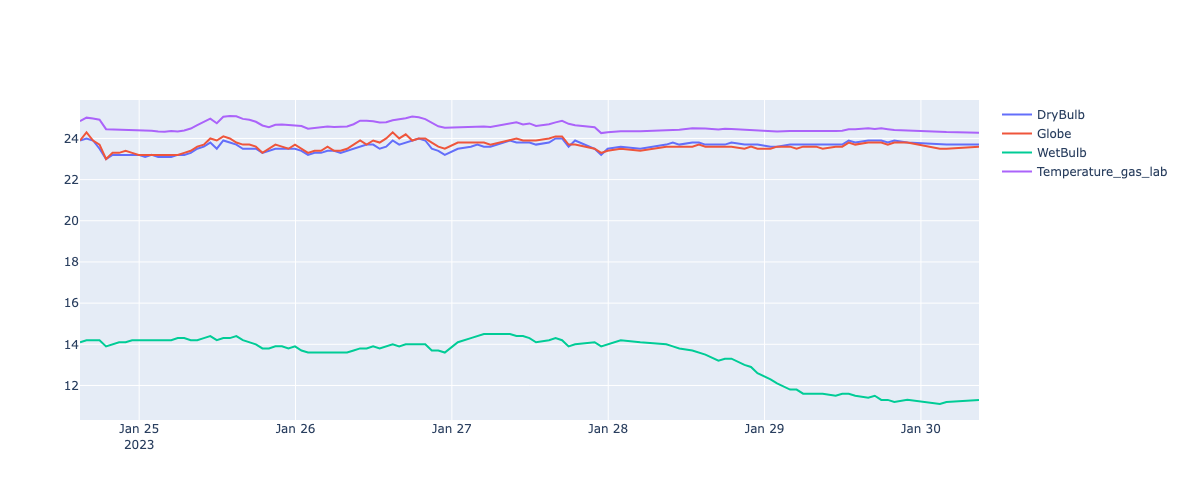

In [82]:
import plotly.graph_objs as go

layout = go.Layout(
    autosize=False,
    width=1000,
    height=500)
    
    
fig = go.Figure([{
    'x': df_all.index,
    'y': df_all[col],
    'name': col
}  for col in temp_columns], layout=layout)
fig.show()

In [26]:
list(df_all.columns)


['Timestamp',
 'CO2_gas_lab',
 'Temperature_gas_lab',
 'Humidity_gas_lab',
 'DryBulb',
 'Globe',
 'HeatIndex',
 'Humidity',
 'WBGTIn',
 'WBGTOut',
 'WetBulb',
 'outdoor_air_temp_C',
 'outdoor_relative_humidity_%',
 'outdoor_wind_speed_mpers',
 'outdoor_wind_direction_deg',
 'Outdoor_wind_gust_mpers',
 'precip_accum_mm',
 'sea_level_pressure_pascals',
 'dew_point_temperature_C',
 'outdoor_wind_chill_C',
 'wind_cardinal_direction']

In [27]:
df.head()

df= df[~(df['CO2_gas_lab'] <= 10)]

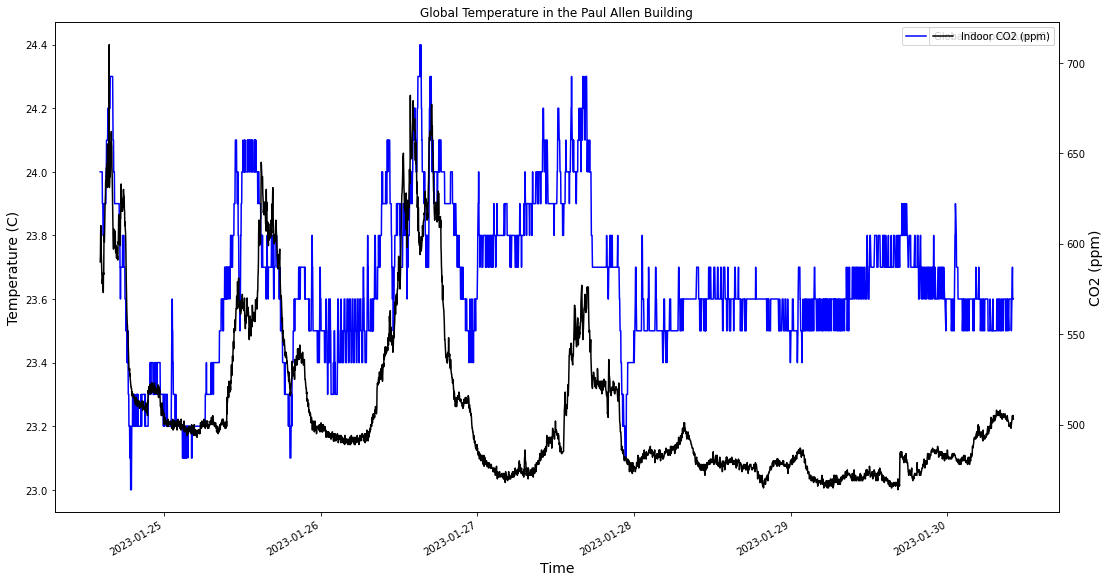

In [50]:
fig,ax = plt.subplots(figsize=(18,10))

ax2 = ax.twinx()

df_temp_co2.plot(y='CO2_gas_lab' ,color='k', markerfacecolor='white', ax=ax2, label = "Indoor CO2 (ppm)",use_index=True)
#ins.plot(x='Date_Time', y='TA',color='dodgerblue', markerfacecolor='white', ax=ax, label = "Indoor TA")

#should drop 0 

df_temp_co2.plot( y='Globe' ,color='b', markerfacecolor='white', ax=ax, label = "Global Temperature (C)", use_index=True)
#ins.plot(x='Date_Time', y='TA',color='dodgerblue', markerfacecolor='white', ax=ax, label = "Indoor TA")


ax.set_title('Global Temperature in the Paul Allen Building')
ax.set_xlabel("Time",fontsize=14)
ax.set_ylabel("Temperature (C)",color='k',fontsize=14);
ax2.set_ylabel("CO2 (ppm)",color='k',fontsize=14);


In [35]:
df['time_hour'] = df['Timestamp'].dt.hour
df_temp['time_hour'] = df_temp['Timestamp'].dt.hour

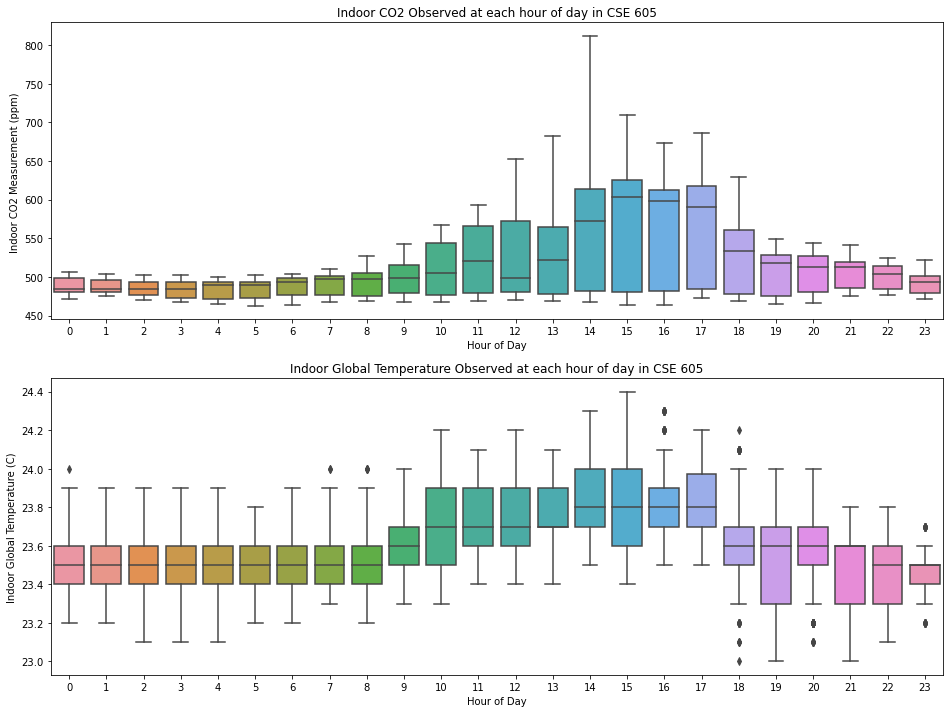

In [37]:
import matplotlib.pyplot as plt
import seaborn



fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1,figsize=(16,12))

seaborn.boxplot(x = df.time_hour, 
                y = df.CO2_gas_lab,
                #palette=my_pal,
                ax = ax0)

seaborn.boxplot(x = df_temp.time_hour, 
                y = df_temp.Globe,
                #palette=my_pal,
                ax = ax1)



ax0.set(ylabel='Indoor CO2 Measurement (ppm) ',
       xlabel='Hour of Day',
       title='Indoor CO2 Observed at each hour of day in CSE 605');

ax1.set(ylabel='Indoor Global Temperature (C)',
       xlabel='Hour of Day',
       title='Indoor Global Temperature Observed at each hour of day in CSE 605');

#plt.savefig('box_plot_hour.pdf')  